In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, RocCurveDisplay)

In [3]:
train_df = pd.read_pickle("train.pkl")
test_df = pd.read_pickle("test.pkl")

In [4]:
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

In [5]:
n_runs = 20

In [6]:
# Pipeline com SMOTE e MLPClassifier
pipeline_mlp = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(max_iter=200, random_state=42))
])

# Grid de hiperparâmetros conforme fornecido
param_dist_mlp = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50,50), (100,50), (100,100)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [1e-4, 1e-3, 1e-2],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1]
}

# Validação cruzada estratificada (k=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [7]:
best_scores_mlp = []         # Armazena o F1 no teste de cada rodada
best_params_mlp = []         # Armazena os melhores hiperparâmetros de cada rodada
cv_results_history_mlp = []  # Armazena o cv_results_ de cada rodada

for i in range(n_runs):
    print(f"\nRodada {i+1}/{n_runs}")
    
    mlp_search = RandomizedSearchCV(
        estimator=pipeline_mlp,
        param_distributions=param_dist_mlp,
        n_iter=4,                 # 4 iterações por questão de tempo
        scoring='f1_macro',        # Métrica principal
        cv=cv,
        random_state=42 + i,       # Variação da semente para cada rodada
        n_jobs=-1,
        verbose=1
    )
    
    mlp_search.fit(X_train, y_train)
    
    # Armazenar o histórico da validação cruzada
    cv_results = pd.DataFrame(mlp_search.cv_results_)
    cv_results_history_mlp.append(cv_results)
    
    # Avaliar o melhor modelo da rodada no conjunto de teste
    best_model_mlp = mlp_search.best_estimator_
    y_pred_test = best_model_mlp.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test, average='macro')
    
    best_scores_mlp.append(f1_test)
    best_params_mlp.append(mlp_search.best_params_)
    
    print("Melhores hiperparâmetros:", mlp_search.best_params_)
    print("Melhor F1 (validação cruzada - média):", mlp_search.best_score_)
    print("F1 no Teste:", f1_test)



Rodada 1/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp__solver': 'adam', 'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.9508846188101184
F1 no Teste: 0.9464100249384632

Rodada 2/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (100,), 'mlp__alpha': 0.0001, 'mlp__activation': 'tanh'}
Melhor F1 (validação cruzada - média): 0.9491551505084808
F1 no Teste: 0.9454548462839977

Rodada 3/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.9509265502065503
F1 no Teste: 0.9438173480077575

Rodada 4/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'adam', 'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (100, 100), 'mlp__alpha': 0.01, 'mlp__activation': 'tanh'}
Melhor F1 (validação cruzada - média): 0.9511323162719876
F1 no Teste: 0.9514906711821585

Rodada 5/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores h

c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.01, 'mlp__hidden_layer_sizes': (100,), 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.950177841547967
F1 no Teste: 0.9503856178921801

Rodada 7/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'adam', 'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (100, 100), 'mlp__alpha': 0.01, 'mlp__activation': 'tanh'}
Melhor F1 (validação cruzada - média): 0.9511323162719876
F1 no Teste: 0.9514906711821585

Rodada 8/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.9512935080134899
F1 no Teste: 0.9464041417529772

Rodada 9/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'adam', 'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.948841829890711
F1 no Teste: 0.9434084540176475

Rodada 10/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (100, 100), 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.9476320833346407
F1 no Teste: 0.9458749676990132

Rodada 11/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (50,), 'mlp__alpha': 0.0001, 'mlp__activation': 'tanh'}
Melhor F1 (validação cruzada - média): 0.9493793271417067
F1 no Teste: 0.9484377220738613

Rodada 12/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.951753383020896
F1 no Teste: 0.945830255358095

Rodada 13/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__alpha': 0.01, 'mlp__activation': 'tanh'}
Melhor F1 (validação cruzada - média): 0.9489287936187031
F1 no Teste: 0.9408687438870729

Rodada 14/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.01, 'mlp__hidden_layer_sizes': (100,), 'mlp__alpha': 0.0001, 'mlp__activation': 'tanh'}
Melhor F1 (validação cruzada - média): 0.9496956745837573
F1 no Teste: 0.9500925026835058

Rodada 15/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.01, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.9510039097253926
F1 no Teste: 0.9494496274035179

Rodada 16/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (100,), 'mlp__alpha': 0.01, 'mlp__activation': 'tanh'}
Melhor F1 (validação cruzada - média): 0.949730982638145
F1 no Teste: 0.9455475539206427

Rodada 17/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.01, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.9492330027186509
F1 no Teste: 0.9464100249384632

Rodada 18/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\iantr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores hiperparâmetros: {'mlp__solver': 'sgd', 'mlp__learning_rate_init': 0.1, 'mlp__hidden_layer_sizes': (100,), 'mlp__alpha': 0.0001, 'mlp__activation': 'tanh'}
Melhor F1 (validação cruzada - média): 0.9491551505084808
F1 no Teste: 0.9454548462839977

Rodada 19/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'adam', 'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (50,), 'mlp__alpha': 0.0001, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.9496406279396418
F1 no Teste: 0.9464327260134017

Rodada 20/20
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores hiperparâmetros: {'mlp__solver': 'adam', 'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (50,), 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
Melhor F1 (validação cruzada - média): 0.950854591349378
F1 no Teste: 0.9403926709267423


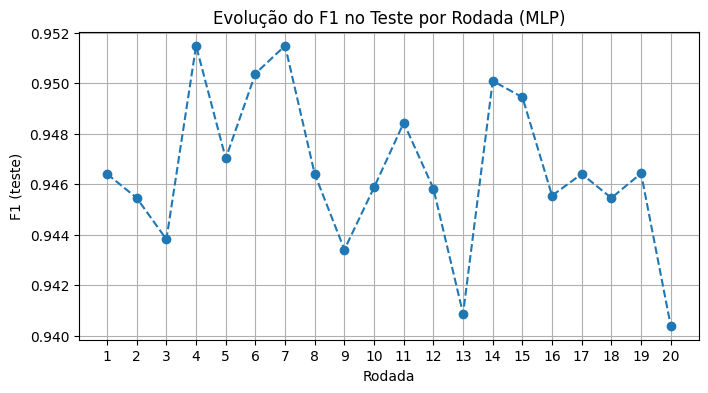

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_runs+1), best_scores_mlp, marker='o', linestyle='--')
plt.title("Evolução do F1 no Teste por Rodada (MLP)")
plt.xlabel("Rodada")
plt.ylabel("F1 (teste)")
plt.xticks(range(1, n_runs+1))
plt.grid(True)
plt.show()


In [9]:
best_run_index = np.argmax(best_scores_mlp)
print(f"Melhor rodada: {best_run_index+1}")
print(f"F1 na melhor rodada: {best_scores_mlp[best_run_index]}")
print("Melhores hiperparâmetros:", best_params_mlp[best_run_index])


Melhor rodada: 4
F1 na melhor rodada: 0.9514906711821585
Melhores hiperparâmetros: {'mlp__solver': 'adam', 'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (100, 100), 'mlp__alpha': 0.01, 'mlp__activation': 'tanh'}


In [10]:
melhores_parametros = best_params_mlp[best_run_index]

best_mlp_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=melhores_parametros['mlp__hidden_layer_sizes'],
        activation=melhores_parametros['mlp__activation'],
        solver=melhores_parametros['mlp__solver'],
        alpha=melhores_parametros['mlp__alpha'],
        learning_rate_init=melhores_parametros['mlp__learning_rate_init'],
        max_iter=200,
        random_state=42
    ))
])

best_mlp_pipeline.fit(X_train, y_train)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.01,
                               hidden_layer_sizes=(100, 100),
                               random_state=42))])

Desempenho no Conjunto de Teste:
Acurácia : 0.9602
Precisão : 0.9497
Recall   : 0.9533
F1-score : 0.9515
AUC      : 0.9897


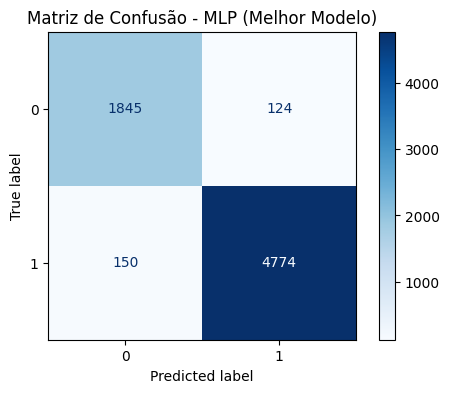

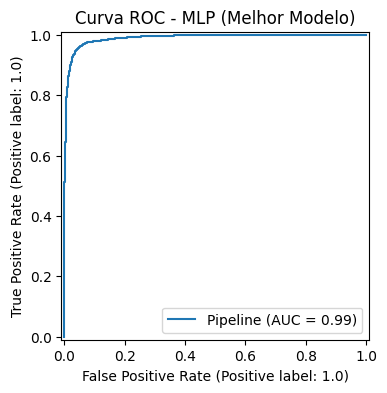


Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.92      0.94      0.93      1969
         1.0       0.97      0.97      0.97      4924

    accuracy                           0.96      6893
   macro avg       0.95      0.95      0.95      6893
weighted avg       0.96      0.96      0.96      6893



In [11]:
y_pred = best_mlp_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Desempenho no Conjunto de Teste:")
print(f"Acurácia : {acc:.4f}")
print(f"Precisão : {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# Para problemas binários, calcular AUC
try:
    y_proba = best_mlp_pipeline.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC      : {auc:.4f}")
except ValueError:
    print("Não foi possível calcular AUC (possivelmente problema multiclasse).")

# Plot da Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusão - MLP (Melhor Modelo)")
plt.show()

# Plot da Curva ROC (apenas para problema binário)
try:
    fig_roc, ax_roc = plt.subplots(figsize=(6, 4))
    RocCurveDisplay.from_estimator(best_mlp_pipeline, X_test, y_test, ax=ax_roc)
    plt.title("Curva ROC - MLP (Melhor Modelo)")
    plt.show()
except ValueError:
    print("Não foi possível gerar a Curva ROC (possivelmente é um problema multiclasse).")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
